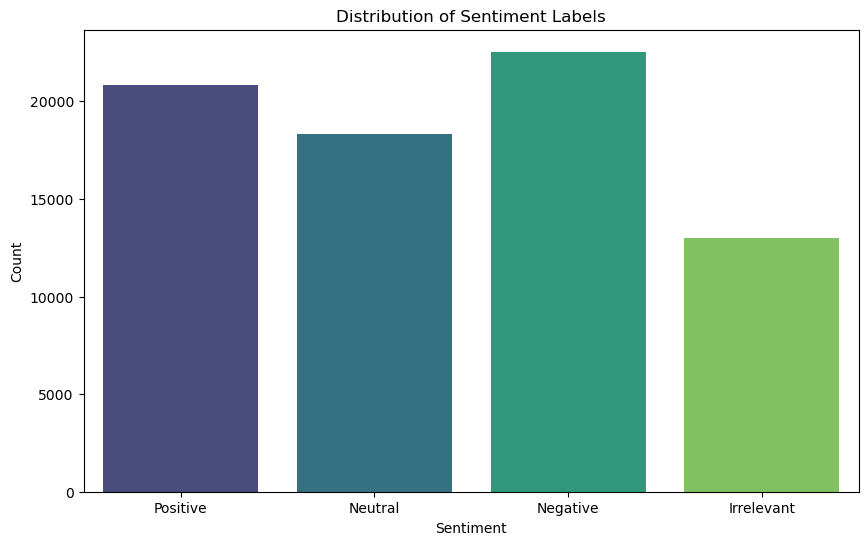

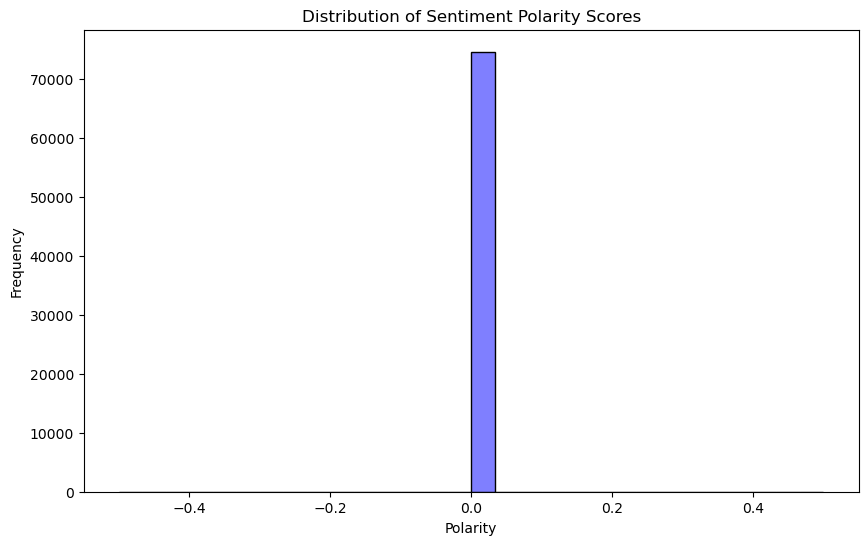

Word Cloud for Positive Sentiment:


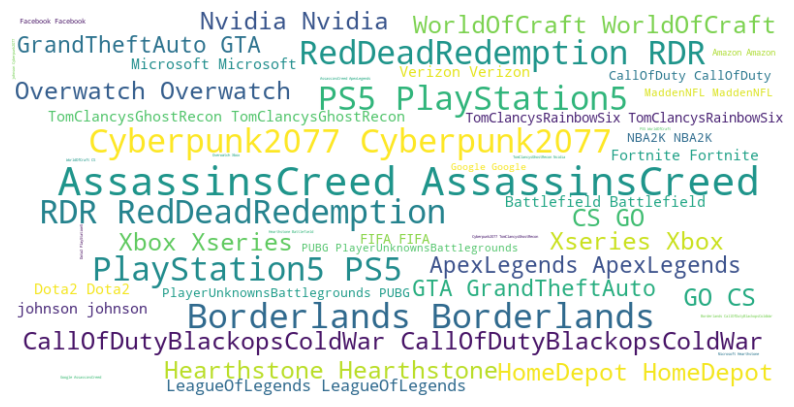

Word Cloud for Negative Sentiment:


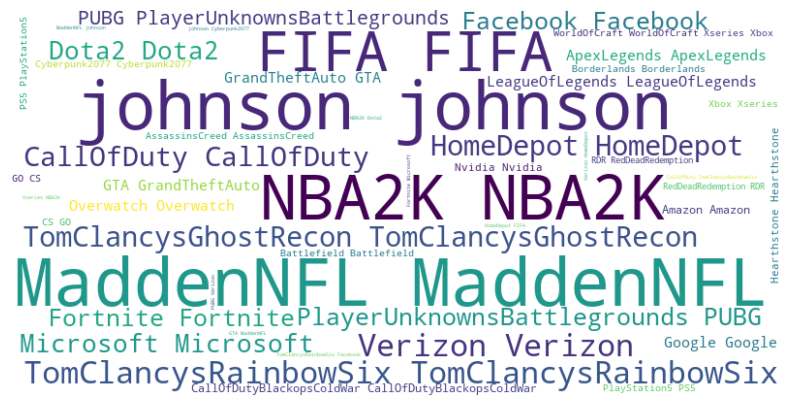

Word Cloud for Neutral Sentiment:


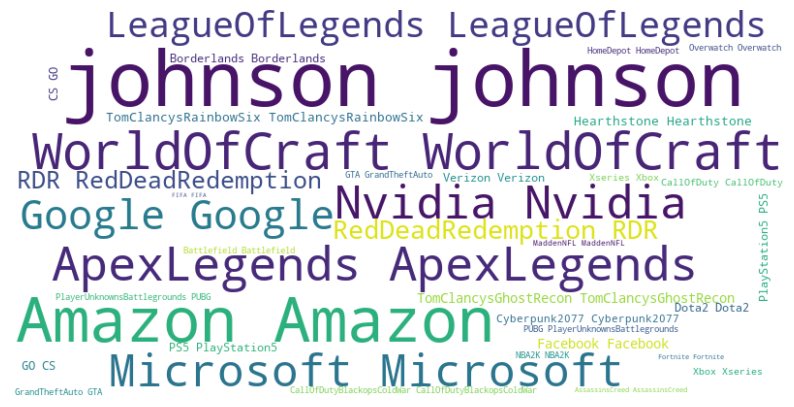

Word Cloud for Irrelevant Sentiment:


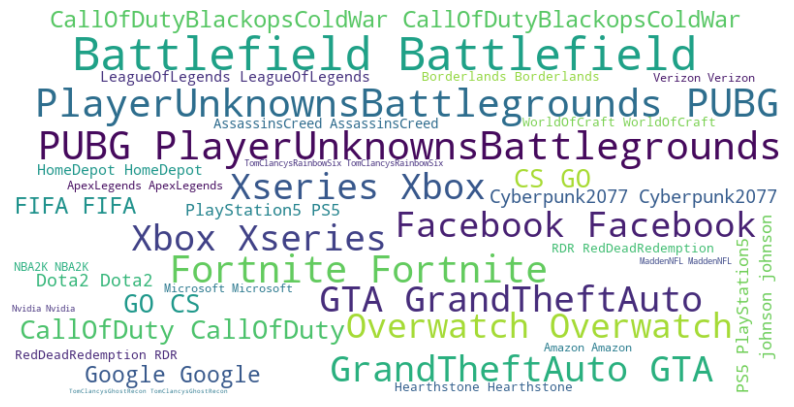

In [1]:
"""Develop a hand gesture recognition model that can accurately identify and 
   classify different hand gestures from image or video data, 
   enabling intuitive human-computer interaction and gesture-based control systems."""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
df = pd.read_csv('twitter_training.csv')
text_column = 'Borderlands'  
sentiment_column = 'Positive'  
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  
df['polarity'] = df[text_column].apply(analyze_sentiment)
sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0, 'Irrelevant': 0}  
df['sentiment_numeric'] = df[sentiment_column].map(sentiment_map)
plt.figure(figsize=(10, 6))
sns.countplot(x=sentiment_column, data=df, palette='viridis')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Sentiment Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
for sentiment in ['Positive', 'Negative', 'Neutral', 'Irrelevant']:
    text = df[df[sentiment_column] == sentiment][text_column]
    print(f"Word Cloud for {sentiment} Sentiment:")
    generate_wordcloud(text)